### Импорт библиотек

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка файла

In [27]:
data = pd.read_excel(r"C:\Users\Николай\Desktop\Питон_нейронка\Data_for_neural_network_2.xlsx",index_col = 0)
data.head(20)

,X6,X16,X26,X31,X39,Class
Наименование,,,,,,
Абдулинский,20.8,58.5,69,15626,0.1,1.0
Адамовский,12.4,93.0,180,23410,1.4,3.0
Акбулакский,11.9,39.8,224,9855,0.7,3.0
Александровский,13.6,55.0,116,4881,0.2,3.0
Асекеевский,17.2,63.5,172,15466,5.3,1.0
Беляевский,14.7,50.8,163,12186,0.1,3.0
Бугурусланский,19.4,62.0,104,7621,2.1,1.0
Бузулукский,18.6,43.4,142,9143,6.2,1.0
Гайский,17.7,75.3,77,28919,0.2,1.0


### Деление на обучающую и тестовую выборку

In [28]:
train = data [data['Class'].notna()]
train.head()

,X6,X16,X26,X31,X39,Class
Наименование,,,,,,
Абдулинский,20.8,58.5,69,15626,0.1,1.0
Адамовский,12.4,93.0,180,23410,1.4,3.0
Акбулакский,11.9,39.8,224,9855,0.7,3.0
Александровский,13.6,55.0,116,4881,0.2,3.0
Асекеевский,17.2,63.5,172,15466,5.3,1.0


In [29]:
test = data [data['Class'].isna()]
test.head()

,X6,X16,X26,X31,X39,Class
Наименование,,,,,,
Северный,19.6,98.0,37,10028,5.2,NaN
Сорочинский,19.0,98.9,94,7992,13.6,NaN
Ташлинский,12.5,71.8,104,20077,7.6,NaN
Тоцкий,10.6,31.1,214,6730,1.4,NaN
Тюльганский,14.2,111.0,172,9785,0.1,NaN


In [30]:
k = train['Class'].nunique()
k

3

### Формирование желаемых векторов

In [31]:
y = train['Class'].values.reshape (-1,1).astype('int')
d_all = np.zeros((y.shape[0],k))
for i in range (len(y)):
    d_all[i][y[i]-1] = 1

In [32]:
d_all

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [33]:
train = train.drop (columns = ['Class'])
train.head()

,X6,X16,X26,X31,X39
Наименование,,,,,
Абдулинский,20.8,58.5,69,15626,0.1
Адамовский,12.4,93.0,180,23410,1.4
Акбулакский,11.9,39.8,224,9855,0.7
Александровский,13.6,55.0,116,4881,0.2
Асекеевский,17.2,63.5,172,15466,5.3


### Стандартизация обучающей выборки

In [34]:
mean_train = train.mean()
std_train = train.std()
train = (train - mean_train)/std_train
train

,X6,X16,X26,X31,X39
Наименование,,,,,
Абдулинский,2.155774,-0.464748,-0.438582,-0.281627,-0.608383
Адамовский,-1.181702,0.752612,-0.032566,-0.112669,-0.558520
Акбулакский,-1.380362,-1.124592,0.128377,-0.406892,-0.585370
Александровский,-0.704920,-0.588248,-0.266665,-0.514857,-0.604548
Асекеевский,0.725427,-0.288319,-0.061829,-0.285100,-0.408930
Беляевский,-0.267870,-0.736449,-0.094749,-0.356295,-0.608383
Бугурусланский,1.599528,-0.341248,-0.310559,-0.455383,-0.531670
Бузулукский,1.281673,-0.997563,-0.171563,-0.422346,-0.374409
Гайский,0.924086,0.128053,-0.409319,0.006909,-0.604548


### Определение числа скрытых слоев и инициализация весов

In [35]:
hidden = 9

In [36]:
w1 = np.random.rand(hidden,train.shape[1])

In [37]:
w1

array([[0.92299687, 0.63333193, 0.21706688, 0.5033064 , 0.44415765],
       [0.11031696, 0.02409802, 0.28028469, 0.70359212, 0.9588943 ],
       [0.96590037, 0.32516216, 0.65383689, 0.92457425, 0.53052357],
       [0.14827713, 0.13153889, 0.94460191, 0.74843175, 0.01860091],
       [0.5148416 , 0.42958598, 0.99559354, 0.50204675, 0.14787148],
       [0.73883498, 0.83855298, 0.67081432, 0.8598806 , 0.93990109],
       [0.79194314, 0.84265608, 0.10530003, 0.85350537, 0.06827255],
       [0.51548828, 0.17924172, 0.07076712, 0.15276477, 0.34413571],
       [0.82019054, 0.67010481, 0.01990744, 0.50433084, 0.58318613]])

In [38]:
w2 = np.random.rand (k,hidden)
w2

array([[0.74349932, 0.62800074, 0.78441888, 0.90574067, 0.98806067,
        0.44817996, 0.90343541, 0.37750571, 0.23817647],
       [0.94520492, 0.91896907, 0.03182919, 0.21805243, 0.73868796,
        0.42001784, 0.2044497 , 0.82725343, 0.48352004],
       [0.39688312, 0.67830785, 0.31894644, 0.55872559, 0.68553797,
        0.64884892, 0.83344034, 0.88724441, 0.56482286]])

### Обучение

In [39]:
epoch = 50
mse = 0
d = {}
for i in range (epoch):
    for j in range (train.shape[0]) :
        x = train.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        mse += np.sum ((sigm_s2-d_all[j].reshape(-1,1))**2)/2
        delta_2 = (sigm_s2-d_all[j].reshape(-1,1))*(sigm_s2*(1-sigm_s2)) 
        delta_1 = w2.T@delta_2
        w2 -= 0.1 * delta_2@sigm_s1.T
        w1 -= 0.1 * delta_1@x.T
    d[i] = mse
    mse = 0

### График ошибки сети

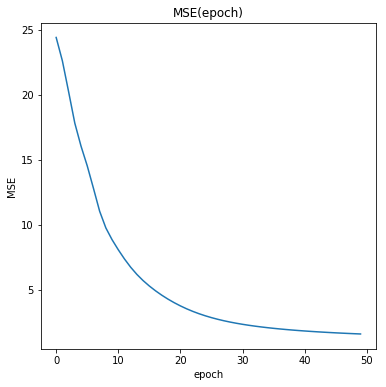

In [40]:
plt.figure(figsize = (6,6))
plt.title ('MSE(epoch)')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.plot(d.keys(),d.values())

### Итоговые матрицы весов

In [41]:
w1

array([[ 6.16097037,  4.28228201,  2.66370967,  3.29360612,  1.82948756],
       [-2.04285544,  0.56581789,  1.41186096,  1.83162534,  1.52117331],
       [ 6.43048418, -0.97678482, -2.1925209 , -1.91687244, -0.70845554],
       [ 0.7101245 , -2.84308588, -2.29511604, -2.71841628, -1.55069164],
       [ 4.00297984,  2.10475334,  1.8224287 ,  1.55328402,  0.77468424],
       [-0.66109163,  0.31555448,  0.51246607,  0.63721881,  0.82667078],
       [ 2.31463437, -2.106433  , -3.43675633, -2.89443022, -1.53510946],
       [-5.29887588, -1.92614217, -0.63111851, -0.86284021, -0.14750379],
       [-0.6661492 ,  0.18921232, -0.11585382,  0.28387373,  0.45887026]])

In [42]:
w2

array([[ 0.4323742 , -0.92460311,  1.43385633,  0.26095681,  0.5850382 ,
        -0.69501527,  0.80101243, -1.62379502, -0.83701564],
       [ 0.80336201,  0.19954568, -1.21451096, -1.30551058,  0.58639715,
        -0.19095853, -1.2660746 , -1.0217737 , -0.46775426],
       [-1.44498341,  0.5164294 , -1.56611539,  0.13978079, -0.95884397,
         0.00440449, -0.17305055,  1.63219323, -0.14476547]])

In [43]:
### загузка и стандартизация тестовой выборки

data_test = pd.read_excel(r"C:\Users\Николай\Desktop\Питон_нейронка\Data_for_neural_network_2.xlsx",index_col = 0)

test = data_test[data_test['Class'].isnull()]
test = test.drop (columns = ['Class'])

#test = pd.read_excel('test.xlsx',index_col = 0)
test

,X6,X16,X26,X31,X39
Наименование,,,,,
Северный,19.6,98.0,37,10028,5.2
Сорочинский,19.0,98.9,94,7992,13.6
Ташлинский,12.5,71.8,104,20077,7.6
Тоцкий,10.6,31.1,214,6730,1.4
Тюльганский,14.2,111.0,172,9785,0.1
Шарлыкский,16.2,65.7,129,14754,3.3
Ясненский,14.4,87.4,62,16464,1.0
г.Абдулино,16.9,99.5,162,7473,0.2
г.Бугуруслан,15.5,75.2,244,31121,0.3


In [44]:
test = (test - mean_train) / std_train
test

,X6,X16,X26,X31,X39
Наименование,,,,,
Северный,1.678991,0.929041,-0.555631,-0.403137,-0.412765
Сорочинский,1.440600,0.960798,-0.347137,-0.447330,-0.090571
Ташлинский,-1.141970,0.004553,-0.310559,-0.185014,-0.320710
Тоцкий,-1.896876,-1.431579,0.091799,-0.474723,-0.558520
Тюльганский,-0.466529,1.387756,-0.061829,-0.408411,-0.608383
Шарлыкский,0.328108,-0.210690,-0.219114,-0.300555,-0.485643
Ясненский,-0.387065,0.555011,-0.464186,-0.263438,-0.573863
г.Абдулино,0.606231,0.981969,-0.098407,-0.458595,-0.604548
г.Бугуруслан,0.049985,0.124525,0.201533,0.054705,-0.600712


### Предсказание

In [45]:
d_train = {}
for j in range (train.shape[0]) :
        x = train.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        d_train[train.index[j]] = np.argmax(sigm_s2)+1

In [46]:
d_test ={}
for j in range (test.shape[0]) :
        x = test.values[j].reshape (train.shape[1],1)
        s1 = w1@x
        sigm_s1 = 1/(1+np.exp(-s1))
        s2 = w2@sigm_s1
        sigm_s2 = 1/(1+np.exp(-s2))
        d_test[test.index[j]] = np.argmax(sigm_s2)+1

In [47]:
df_train = pd.DataFrame.from_dict(data = d_train, orient = 'index',columns = ['Класс'])
df_train

,Класс
Абдулинский,1
Адамовский,3
Акбулакский,3
Александровский,3
Асекеевский,1
Беляевский,3
Бугурусланский,1
Бузулукский,1
Гайский,1
Грачевский,1


In [48]:
df_test = pd.DataFrame.from_dict(data = d_test, orient = 'index',columns = ['Класс'])
df_test

,Класс
Северный,1
Сорочинский,1
Ташлинский,3
Тоцкий,3
Тюльганский,3
Шарлыкский,1
Ясненский,3
г.Абдулино,1
г.Бугуруслан,1
г.Гай,2


### Выгрузка в эксель

In [49]:
df_train.to_excel('train_res.xlsx')
df_test.to_excel('test_res.xlsx')